# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [75]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [77]:
df_1 = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [78]:
import json

df_list = []
with open ('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))


In [79]:
df_2 = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Assessing the first dataframe, df, visually and programmatically.

In [80]:
# Displaying the twitter-archived-enhanced file, df
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [81]:
#Assessing df dataframe for quality and tidiness issues using the .info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [82]:
# Assessing the df dataframe using the .describe function
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [83]:
# Assessing the df dataframe using the sample function.
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1669,682429480204398592,NaN,NaN,2015-12-31 05:14:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I know we joke around on here, but this is getting really frustrating. We rate dogs. Not T-Rex. Thank you... 8/10 https://t.co/5aFw7SWyxU",NaN,NaN,NaN,https://twitter.com/dog_rates/status/682429480204398592/photo/1,8,10,None,None,None,None,None
2229,668248472370458624,NaN,NaN,2015-11-22 02:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Bisquick. He is a Brown Douglass Fir terrier. Very inbred. Looks terrified. 8/10 still cute tho https://t.co/1XYRh8N00K,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668248472370458624/photo/1,8,10,Bisquick,None,None,None,None
751,779056095788752897,NaN,NaN,2016-09-22 20:33:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Everybody drop what you're doing and look at this dog. 13/10 must be super h*ckin rare https://t.co/I1bJUzUEW5,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/779056095788752897/photo/1,https://twitter.com/dog_rates/status/779056095788752897/photo/1",13,10,None,None,None,None,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,"https://twitter.com/dog_rates/status/866334964761202691/photo/1,https://twitter.com/dog_rates/status/866334964761202691/photo/1",12,10,Coco,None,None,None,None
935,753398408988139520,NaN,NaN,2016-07-14 01:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. Her batteries are low. 12/10 precious af https://t.co/ov05LIoQJX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753398408988139520/video/1,12,10,Scout,None,None,None,None


In [84]:
# Using the isnull function to assess the dataframe.
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [85]:
# Using the duplicated function to assess the dataframe.
df.duplicated().sum()

0

In [86]:
df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [87]:
df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

##### Twitter-archived-enhanced(df) dataframe columns.
- tweet_id: a unique id for used for a particular twitter user.
- in_reply_to_status_id: specific reply for a particular status id.
- in_reply_to_user_id: specifid reply for a particular user id.
- timestamp: the time a tweet was made.
- source: a particular source of the tweet.
- text: an introductory message about a dog.
- retweeted_status_user_id: a retweeted status of a particular user id.
- retweeted_status_timestamp: a retweeted status at a particular timestamp.
- expanded_urls: a link to a particular tweet made.
- rating_numerator: a numerical rating  given to the dogs that gives the performance rate.
- rating_denominator: a numerical limit standard that has been put in place for rating the dogs.
- name: the name of the dog.
- doggo: affectionate name for a dog.
- floofer: affectionate name for a dog.
- pupper: affectionate name for a dog.
- puppo: affectioante name for a dog.

#### Assessing the df_1 dataframe visually and programmatically.

In [88]:
# Displaying the image predictions  dataframe(df_1)
df_1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [89]:
# Assessing the df_1 dataframe using the info function
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [90]:
# Assessing the df_1 using the describe function.
df_1.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [91]:
# Assessing the df_1 dataframe using the sample function.
df_1.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
537,676948236477857792,https://pbs.twimg.com/media/CWUA1GFW4AAowiq.jpg,1,guenon,0.611603,False,macaque,0.135176,False,squirrel_monkey,0.083247,False
564,678255464182861824,https://pbs.twimg.com/media/CWmlvxJU4AEAqaN.jpg,1,Chihuahua,0.613819,True,Yorkshire_terrier,0.127931,True,Pomeranian,0.062124,True
1783,829011960981237760,https://pbs.twimg.com/media/C4E99ygWcAAQpPs.jpg,2,boxer,0.312221,True,dalmatian,0.244040,True,conch,0.130273,False
887,699072405256409088,https://pbs.twimg.com/ext_tw_video_thumb/699072391083880449/pu/img/fMp1-dvLMeio1Kzk.jpg,1,Shih-Tzu,0.599587,True,Pekinese,0.213069,True,Maltese_dog,0.154293,True
919,701889187134500865,https://pbs.twimg.com/media/Cb2cfd9WAAEL-zk.jpg,1,French_bulldog,0.902856,True,Staffordshire_bullterrier,0.022634,True,soap_dispenser,0.011973,False


In [92]:
# Assessing df_1 using isnull function.
df_1.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [93]:
# Assessing df_1 using the duplicated function.
df_1.duplicated().sum()

0

#### Assessing the df_2 dataframe visually and programatically.

In [94]:
# Assessing df_2 using the head function.
df_2.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [95]:
# Assessing df_2 using the info function.
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [96]:
# Assessing df_2 using the describe function.
df_2.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [97]:
# Assessing df_2 using the sample function.
df_2.sample(5)

,id,retweet_count,favorite_count
264,842115215311396866,3386,15204
761,778039087836069888,3065,9417
275,840632337062862849,1972,9761
554,803692223237865472,8689,0
145,863471782782697472,2687,0


In [98]:
# Assessing df_2 using isnull function.
df_2.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [99]:
# Assessing df_2 using duplicated function.
df_2.duplicated().sum()

0

### Quality Issues 
#### Dataframe df
1. The first column, tweet_id is in integer form, instead of being a string.
2. The timestamp is in object form, it should be changed to timestamp for.
3. The source column is incomplete because only the truncated data can be viewed.
4. Extracting the source name from the source column.
5. Change all the names in the names column that start with a lowercase letter to NaN

#### Dataframe df_1
6. The tweet_id is in interger form whereas it's supposed to be a string.
7. Change the titles p1, p1_conf, p1_dog, p2, p2_conf,p2_dog, p3,p3_conf and p3_dog to be meaningful titles.
8. The names in column p1 are separated by a hyphen and should be capitalized.
9. The names in column p2 are separated by a hyphen and should be capitalized.
10. The names in column p3 are separated by a hyphen and should be capitalized.

#### Dataframe df_2
11. id column is an integer its supposed to be a string.
12. Id column to be renamed tweet_id.

### Tidiness Issues.
#### Dataframe df
13. Add a column called rates and compute the rates by taking numumerical value/denominator value.
14. in_reply_status_id, in_reply_retweet_id, retweet_status_id, retweeted_status_user_id, retweeted_status_timestamp columns should be dropped.
15. doggo, floofer, pupper and puppo are is a one variable and should be in one column.

#### Dataframe df_3
16. tweet_id column is a common column across the three dataframes thus all of them need to be merged. 


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [100]:
# Make copies of original pieces of data
# Copies of the original dataframes.
df_clean = df.copy()
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()

### Cleaning Quality Issues Dataframe df

### Issue #1: The first column, tweet_id is in integer form, instead of being a string.

#### Define: Change the tweet_id column nature from integer to string.


#### Code

In [101]:
# Cleaning code using astype(str)
df_clean['tweet_id'] = df_clean['tweet_id'].values.astype(str)

#### Test

In [102]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #2: The timestamp is in object form, it should be changed to timestamp for.

#### Define Convert the timestamp column from object to timestamp.

#### Code

In [103]:
# Converting  the timestamp column from object datatype to timestamp.
df_clean['timestamp']= pd.to_datetime(df_clean['timestamp'])

#### Test

In [104]:
# Testing the code
df_clean.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2356 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 18.5 KB


### Issue #3: The source column is incomplete because only the truncated data can be viewed.

#### Define Source column is incomplete because only the truncated data can be viewed.


#### Code

In [105]:
# Displaying the whole contents in the source column
pd.set_option('display.max_colwidth', None) 

### Test

In [106]:
# Testing the code
pd.set_option('display.max_colwidth', None) 
df_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


### Issue #4: Extracting the source name from the source column.

#### Define Extract the source name from the source column

### Code

In [107]:
# Using the str.split function to seperate the source from the entire link.
df_clean['source'] = df_clean.source.str.split('>', expand=True)[1].str.replace('</a', '')


### Test

In [108]:
# Testing the cleaning code
df_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #5: Change all the names in the names column that start with a lowercase letter to NaN


### Define: Change all the names in the names column that start with a lowercase letter to NaN

### Code

In [109]:
# Identifying all the names in the names column that are in lowercase in order to rename them to NaN
mylist = list(df_clean.name)
lower_names = []

for element in mylist:
   if element.islower() or element == 'None':
       if element not in lower_names:
           lower_names.append(element)
           continue 
lower_names   

['None',
 'such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [110]:
# Applying the NaN to names in lowercase.
df_clean.name = df_clean.name.apply(lambda x: np.nan if x in lower_names else x)
          

### Test

In [111]:
# Testing the code
df_clean[df_clean['name'].isnull()]      

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,NaN,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,Twitter for iPhone,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,NaN,None,None,None,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09+00:00,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,NaN,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03+00:00,Twitter for iPhone,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,NaN,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,NaN,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,NaN,None,None,None,None


### Cleaning Quality Issues Dataframe df_1

### Issue #6: The tweet_id is in interger form whereas it's supposed to be a string.

#### Define Change the tweet_id from interger to string.

### Code

In [112]:
# Cleaning code to change tweet_id column values form integer to string
df_1_clean['tweet_id'] = df_1_clean['tweet_id'].values.astype(str)

### Test

In [113]:
# Testing the code.
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #7: Change the titles p1, p1_conf, p1_dog, p2, p2_conf,p2_dog, p3,p3_conf and p3_dog to be meaningful titles.

### Define 
#### Change the names of the titles in column p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf and p3_dog to be meaningful titles such that p stands for prediction and conf stands for confidence level.

### Code

In [114]:
# Cleaning code using the rename function.
df_1_clean = df_1_clean.rename(columns={'p1': 'prediction 1', 'p1_conf': 'prediction 1_confidence', 'p1_dog': 'prediction 1_dog', 'p2': 'prediction 2','p2_conf': 'prediction 2_confidence', 'p2_dog': 'prediction 2_dog', 'p3': 'prediction 3', 'p3_conf': 'prediction 3_confidence', 'p3_dog': 'prediction 3_dog'})

### Test

In [115]:
# Testing the code.
df_1_clean.head()

,tweet_id,jpg_url,img_num,prediction 1,prediction 1_confidence,prediction 1_dog,prediction 2,prediction 2_confidence,prediction 2_dog,prediction 3,prediction 3_confidence,prediction 3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #8: The names in column prediction 1 are separated by a hyphen and should be in title case.

### Define: Drop the hyphen between the names in column prediction 1 and capitalize them.

### Code

In [116]:
# Using the replace function to replace this '_' with space and capitalizing all the names in the column.
df_1_clean['prediction 1'] =  df_1_clean['prediction 1'].replace('_', ' ', regex = True)
df_1_clean['prediction 1'] =  df_1_clean['prediction 1'].str.capitalize()

### Test

In [117]:
# Testing if the code worked
df_1_clean.head()

,tweet_id,jpg_url,img_num,prediction 1,prediction 1_confidence,prediction 1_dog,prediction 2,prediction 2_confidence,prediction 2_dog,prediction 3,prediction 3_confidence,prediction 3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [118]:
# Drop the following columns, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,NaN,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,NaN,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,NaN,None,None,None,None


### Issue #9: The names in column prediction 2 are separated by a hyphen and should be in title case.

#### Define: Drop the hyphen between the names in column prediction 2 and capitalize them.

#### Code

In [119]:
# # Using the replace function to replace this '_' with space and capitalizing all the names in the column.
df_1_clean['prediction 2'] =  df_1_clean['prediction 2'].replace('_', ' ', regex = True)
df_1_clean['prediction 2'] =  df_1_clean['prediction 2'].str.capitalize()

#### Test

In [120]:
# Testing if the code worked.
df_1_clean.head()

,tweet_id,jpg_url,img_num,prediction 1,prediction 1_confidence,prediction 1_dog,prediction 2,prediction 2_confidence,prediction 2_dog,prediction 3,prediction 3_confidence,prediction 3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #10: The names in column p3 are separated by a hyphen and should be in title case.

#### Define: Drop the hyphen between the names in column prediction 2 and capitalize them.

#### Code

In [121]:
# # Using the replace function to replace this '_' with space and capitalizing all the names in the column.
df_1_clean['prediction 3'] =  df_1_clean['prediction 3'].replace('_', ' ', regex = True)
df_1_clean['prediction 3'] =  df_1_clean['prediction 3'].str.capitalize()

#### Test

In [122]:
# Testing if the code worked.
df_1_clean.head()

,tweet_id,jpg_url,img_num,prediction 1,prediction 1_confidence,prediction 1_dog,prediction 2,prediction 2_confidence,prediction 2_dog,prediction 3,prediction 3_confidence,prediction 3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Cleaning Quality Issues df_2

### Issue #11: id column is an integer its supposed to be a string.

#### Define: Change the id column from being an interger to a string.

#### Code

In [123]:
# Cleaning code.
df_2_clean['id'] = df_2_clean['id'].values.astype(str)


#### Test

In [124]:
# Testing the code.
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #12:  Id column to be renamed tweet_id.

#### Define: Rename the column id to tweet_id

#### Code

In [125]:
# Cleaning code using the rename function.
df_2_clean = df_2_clean.rename(columns={'id': 'tweet_id'})

#### Test

In [126]:
# Testing the code.
df_2_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Tidiness Issues

### Cleaning Tidiness Issues in df

### Issue #13: Add a column called rating and compute the rates by taking numumerical value/denominator value.

#### Define: Add a column called rating and compute the rates by taking numumerical value/denominator value.

In [127]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Code


In [128]:
#   Introducing a new column called rates that's a product of the computation of rating_numerator/rating_denominator
df_clean['rates'] = (df_clean['rating_numerator']/df_clean['rating_denominator'])

### Test

In [129]:
# Finding the value count of each rate.
df_clean.rates.value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
1.400000       54
0.700000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
0.000000        2
7.500000        2
1.500000        2
42.000000       2
0.818182        2
177.600000      1
0.636364        1
1.250000        1
0.733333        1
2.700000        1
3.428571        1
inf             1
18.200000       1
66.600000       1
1.700000        1
2.600000        1
Name: rates, dtype: int64

In [130]:
# Investingating if the additional rates column has been added to the dataframe
df_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rates
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,1.3


#### Test

### Issue #14:  in_reply_status_id, in_reply_retweet_id, retweet_status_id, retweeted_status_user_id, retweeted_status_timestamp columns should be dropped.

### Define: in_reply_status_id, in_reply_retweet_id, retweet_status_id, retweeted_status_user_id, retweeted_status_timestamp columns should be dropped.

#### Code

In [131]:
# Drop the following columns, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
df_clean = df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

In [132]:
df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rates
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,1.3


### Issue #15: doggo, floofer, pupper and puppo are is a one variable and should be in one column.

#### Define: Make the doggo, floofer, pupper and puppo columns to one column

#### Code

In [133]:
# Using the melt function to cahnge  the doggo, floofer, pupper and puppo columns to one.
df_clean = pd.melt(df_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'rates'],value_vars=['doggo', 'floofer', 'pupper', 'puppo'],
                           var_name='slang', value_name='name_2')




### Test

In [134]:
# Testing the code
df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rates,slang,name_2
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,1.3,doggo,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,1.3,doggo,None


#### Test

### Issue #16:  tweet_id column is a common column across the three dataframes thus all of them need to be merged. 
 

#### Define: Combine all the three datasets into one.

#### Code

In [135]:
# Merging all the three dataframes to one dataframe
df_3 = pd.merge(df_clean, df_1_clean, on='tweet_id', how= 'inner')
df_4 = pd.merge(df_3,df_2_clean, on='tweet_id', how='inner')
df_4.isnull().sum()

tweet_id                      0
timestamp                     0
source                        0
text                          0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                       2708
rates                         0
slang                         0
name_2                        0
jpg_url                       0
img_num                       0
prediction 1                  0
prediction 1_confidence       0
prediction 1_dog              0
prediction 2                  0
prediction 2_confidence       0
prediction 2_dog              0
prediction 3                  0
prediction 3_confidence       0
prediction 3_dog              0
retweet_count                 0
favorite_count                0
dtype: int64

#### Test

In [136]:
# The final dataframe after merging
df_4.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rates,slang,...,prediction 1_confidence,prediction 1_dog,prediction 2,prediction 2_confidence,prediction 2_dog,prediction 3,prediction 3_confidence,prediction 3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,1.3,doggo,...,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,8853,39467
1,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,1.3,floofer,...,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,8853,39467


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [137]:
# Saving code
df_4.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights.
#### Finding insights using the describe function

In [138]:
# Using the describe function to get the mean, count and other details about the dataset.
df_4.describe()

,rating_numerator,rating_denominator,rates,img_num,prediction 1_confidence,prediction 2_confidence,prediction 3_confidence,retweet_count,favorite_count
count,8292.000000,8292.000000,8292.000000,8292.000000,8292.000000,8.292000e+03,8.292000e+03,8292.000000,8292.000000
mean,12.265798,10.511819,1.169987,1.203570,0.594532,1.346665e-01,6.034005e-02,2976.089243,8556.718283
std,40.692560,7.179218,3.988158,0.561754,0.271185,1.006648e-01,5.091848e-02,5053.982915,12096.451921
min,0.000000,2.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,0.000000
25%,10.000000,10.000000,1.000000,1.000000,0.364095,5.390140e-02,1.619920e-02,634.000000,1674.000000
50%,11.000000,10.000000,1.100000,1.000000,0.588230,1.186220e-01,4.947150e-02,1408.000000,3864.000000
75%,12.000000,10.000000,1.200000,1.000000,0.843911,1.955730e-01,9.193000e-02,3443.000000,10937.000000
max,1776.000000,170.000000,177.600000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [139]:
# Using the value count function to  know how many times a certain numerator rating occurs.
df_4["rates"].value_counts()

1.200000      1908
1.000000      1724
1.100000      1676
1.300000      1132
0.900000       604
0.800000       380
0.700000       204
1.400000       160
0.500000       140
0.600000       128
0.300000        76
0.400000        60
0.200000        40
0.100000        16
0.000000         8
2.700000         4
7.500000         4
3.428571         4
1.500000         4
177.600000       4
0.818182         4
0.636364         4
2.600000         4
42.000000        4
Name: rates, dtype: int64

#### Which type of source had the most tweets?

In [140]:
# Finding the value count for the source
df_4['source'].value_counts()

Twitter for iPhone    8128
Twitter Web Client     120
TweetDeck               44
Name: source, dtype: int64

In [141]:
# Finding the value count for the rating_numerator.
df_4['rating_numerator'].value_counts()

12      1892
10      1716
11      1652
13      1132
9        604
8        380
7        208
14       160
5        136
6        128
3         76
4         64
2         36
1         20
0          8
27         4
45         4
88         4
144        4
26         4
121        4
143        4
44         4
60         4
80         4
75         4
99         4
50         4
204        4
1776       4
165        4
15         4
84         4
24         4
420        4
Name: rating_numerator, dtype: int64

### Insights:
1. The mean of the ratings of the dogs is 1.17 and this gives us a clue as to where the dataset's center value is. Because it contains data from each observation in a dataset.

2. 1.2 rate occurred the most with 1908 value counts, followed by 1.0, 1.1 and 1.3. The rates that had the least were, 42, 2.6, 0.6, 0.8, 177.6 and 1.5 with a 4.

3. The sources for the tweets were, Twitter for iPhone(8128), Twitter Web Client(120) and TweetDeck(44). This indicates that most users had iPhones.

### Visualization

#### What is the correlationship between the rates and other variables?


In [142]:
# Investigating the relationship among the rates, retweet_count and favourite_count.
xx = df_4[['rates', 'retweet_count', 'favorite_count']] 
xx

,rates,retweet_count,favorite_count
0,1.3,8853,39467
1,1.3,8853,39467
2,1.3,8853,39467
3,1.3,8853,39467
4,1.3,6514,33819
...,...,...,...
8287,0.7,48,132
8288,0.8,532,2535
8289,0.8,532,2535
8290,0.8,532,2535


In [143]:
# Investigating the correlationship among the rates, retweet_count and favorite_count.
corr_matrix = xx.corr()
corr_matrix

,rates,retweet_count,favorite_count
rates,1.000000,0.017448,0.015592
retweet_count,0.017448,1.000000,0.790476
favorite_count,0.015592,0.790476,1.000000


Text(32.09375, 0.5, 'Variables')

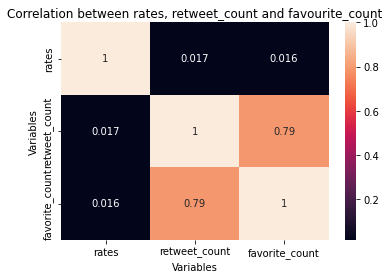

In [144]:
# Plotting a heatmap to show the correlationship among the three variables.
sns.heatmap(corr_matrix, annot= True )
plt.title('Correlation between rates, retweet_count and favourite_count')
plt.xlabel('Variables')
plt.ylabel('Variables')

##### From the above figure, there's a positive correlationship between the variables but a weak one. The relationship between the retweet_count and favorite_count is strong by 0.79. This indicates that for a retweet_count  its likely to be a favorite_count as well.

In [145]:
# Investigating the relationship between rates, prediction 1_confidence, prediction 2_confidence and prediction 3_confidence.
yy = df_4[['rates', 'prediction 1_confidence', 'prediction 2_confidence', 'prediction 3_confidence']]
yy

,rates,prediction 1_confidence,prediction 2_confidence,prediction 3_confidence
0,1.3,0.097049,0.085851,0.076110
1,1.3,0.097049,0.085851,0.076110
2,1.3,0.097049,0.085851,0.076110
3,1.3,0.097049,0.085851,0.076110
4,1.3,0.323581,0.090647,0.068957
...,...,...,...,...
8287,0.7,0.506826,0.074192,0.072010
8288,0.8,0.465074,0.156665,0.061428
8289,0.8,0.465074,0.156665,0.061428
8290,0.8,0.465074,0.156665,0.061428


In [146]:
# Investigating the correlationship between the variables.
corr_matrix = yy.corr()
corr_matrix

,rates,prediction 1_confidence,prediction 2_confidence,prediction 3_confidence
rates,1.000000,-0.008603,-0.013710,-0.004916
prediction 1_confidence,-0.008603,1.000000,-0.511547,-0.709583
prediction 2_confidence,-0.013710,-0.511547,1.000000,0.478953
prediction 3_confidence,-0.004916,-0.709583,0.478953,1.000000


Text(32.09374999999999, 0.5, 'Variables')

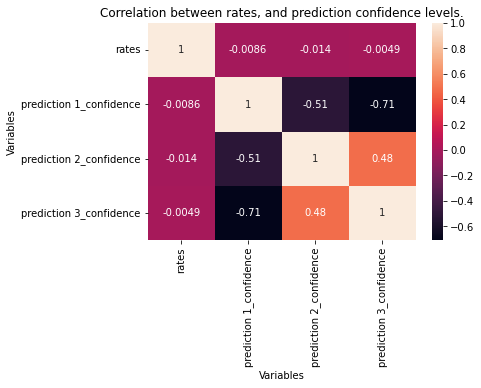

In [147]:
# Plotting a heatmap.
sns.heatmap(corr_matrix, annot= True )
plt.title('Correlation between rates, and prediction confidence levels.')
plt.xlabel('Variables')
plt.ylabel('Variables')

##### From the heatmap above, there's a negative correlationchip between the variables because the values are negative. The only positive correlationship that exists is between prediction 3_confidence and prediction 2_confidence by 0.48.